In [7]:
%matplotlib widget
import numpy as np
import math
from matplotlib import cm
import pandas as pd
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as matlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('week3.csv')
df.columns = ["X1","X2","y"]
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]
df.isnull();

a i)

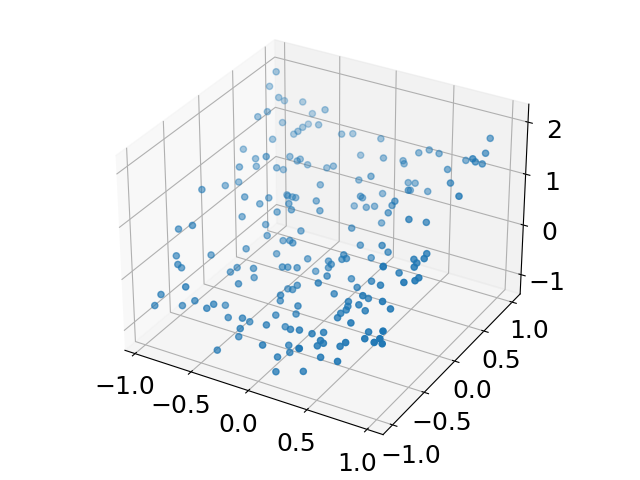

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],y)
plt.show()

a) ii)

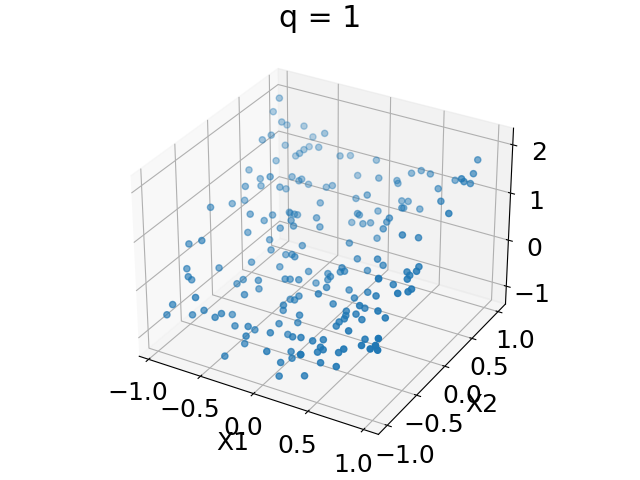

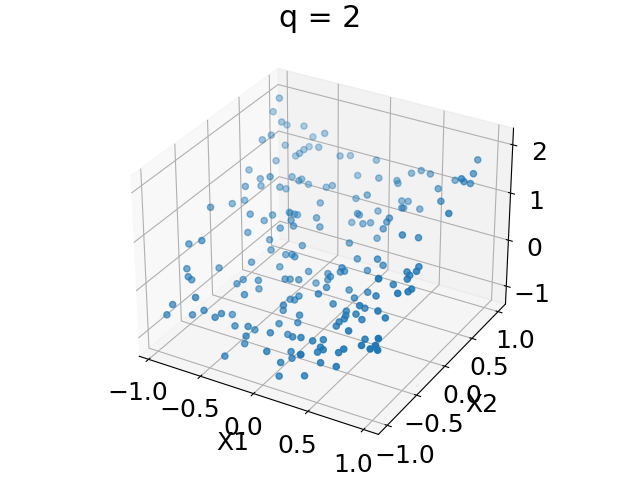

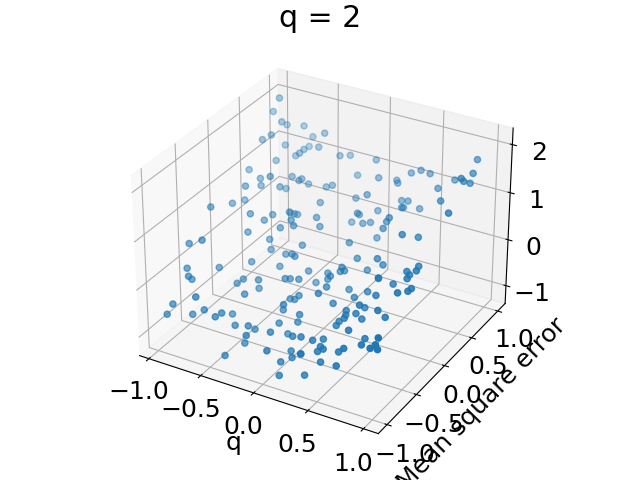

(198, 1)


In [11]:
kf = KFold(n_splits=5)
plt.rc("font", size=18);
plt.rcParams["figure.constrained_layout.use"] = True
mean_error=[]; std_error=[]
q_range = [1,2,3]
for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    temp=[]; plotted = False
    for train, test in kf.split(Xpoly):
        model.fit(Xpoly[train], y[train])
        ypred = model.predict(Xpoly[test])
        from sklearn.metrics import mean_squared_error
        temp.append(mean_squared_error(y[test],ypred))
        if ((q==1) or (q==2) or (q==6)) and not plotted:
            #plt.scatter(X1,X2, color="black")
            ypred = model.predict(Xpoly)
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X[:,0], X[:,1],y)
            plt.title("q = {}".format(q))
            plt.xlabel("X1"); plt.ylabel("X2")
            plt.show()
            plotted = True
#plt.errorbar(q_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('q')
plt.ylabel("Mean square error")
plt.show()

poly = PolynomialFeatures(degree = 1).fit_transform(X,y)
polyDF = pd.DataFrame(poly)
print(polyDF.shape)

In [10]:
Lassomodel = Lasso(alpha=1.0).fit(X,y)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)




Xtest = []
grid = np.linspace(-5,5)
for i in grid:
    for j in grid:
        Xtest = np.append(Xtest, [i,j])
        Xtest = np.array(Xtest)